In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
#from keras.utils import to_categorical
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import datetime
tf.config.run_functions_eagerly(True)

# **Loading, visualising the dataset, and preparing the data**

In [3]:
df_test = pd.read_csv ('fashion-mnist_test.csv')
df_train = pd.read_csv ('fashion-mnist_train.csv') 

In [4]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
'''

df=df_train
df.drop(df[df['label'] ==2].index, inplace = True)
df.drop(df[df['label'] == 3].index, inplace = True)
df.drop(df[df['label'] == 4].index, inplace = True)
df.drop(df[df['label'] ==5].index, inplace = True)
df.drop(df[df['label'] == 6].index, inplace = True)
df.drop(df[df['label'] == 7].index, inplace = True)
df.drop(df[df['label'] == 8].index, inplace = True)
df.drop(df[df['label'] == 9].index, inplace = True)
'''

"\n\ndf=df_train\ndf.drop(df[df['label'] ==2].index, inplace = True)\ndf.drop(df[df['label'] == 3].index, inplace = True)\ndf.drop(df[df['label'] == 4].index, inplace = True)\ndf.drop(df[df['label'] ==5].index, inplace = True)\ndf.drop(df[df['label'] == 6].index, inplace = True)\ndf.drop(df[df['label'] == 7].index, inplace = True)\ndf.drop(df[df['label'] == 8].index, inplace = True)\ndf.drop(df[df['label'] == 9].index, inplace = True)\n"

In [7]:
'''
df=df_test
df.drop(df[df['label'] ==2].index, inplace = True)
df.drop(df[df['label'] == 3].index, inplace = True)
df.drop(df[df['label'] == 4].index, inplace = True)
df.drop(df[df['label'] ==5].index, inplace = True)
df.drop(df[df['label'] == 6].index, inplace = True)
df.drop(df[df['label'] == 7].index, inplace = True)
df.drop(df[df['label'] == 8].index, inplace = True)
df.drop(df[df['label'] == 9].index, inplace = True)
'''

"\ndf=df_test\ndf.drop(df[df['label'] ==2].index, inplace = True)\ndf.drop(df[df['label'] == 3].index, inplace = True)\ndf.drop(df[df['label'] == 4].index, inplace = True)\ndf.drop(df[df['label'] ==5].index, inplace = True)\ndf.drop(df[df['label'] == 6].index, inplace = True)\ndf.drop(df[df['label'] == 7].index, inplace = True)\ndf.drop(df[df['label'] == 8].index, inplace = True)\ndf.drop(df[df['label'] == 9].index, inplace = True)\n"

In [9]:
a = df_train
x_train= a.drop('label',1)
b=df_test
x_test=b.drop('label',1)
y_train=a['label']
y_test=b['label']
x_train, val_x, y_train,val_y = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
print("shape of training features : "+ str(x_train.shape))
print("shape of training labels" + str(y_train.shape))

print("shape of valuation features " + str(val_x.shape))
print("shape of valuation labels" + str(val_y.shape))

print("shape of testing features" + str(x_test.shape))
print("shape of testing labels" + str(y_test.shape))

C:\Users\WELCOME\AppData\Local\Temp/ipykernel_4256/4196552149.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train= a.drop('label',1)
C:\Users\WELCOME\AppData\Local\Temp/ipykernel_4256/4196552149.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test=b.drop('label',1)


shape of training features : (48000, 784)
shape of training labels(48000,)
shape of valuation features (12000, 784)
shape of valuation labels(12000,)
shape of testing features(10000, 784)
shape of testing labels(10000,)


Transforming the Dataframes into arrays

In [10]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
val_features = val_x.to_numpy()
val_labels = val_y.to_numpy()
test_features = x_test.to_numpy()
test_labels = y_test.to_numpy()
    

**Let's see what are the features and the labels**

Let's visualise some of the images that we are trying to classify

IndexError: list index out of range

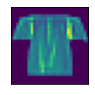

In [11]:
class_names = ['T_shirt/top', 'Trouser']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [12]:
plt.figure()
x1 = train_labels
plt.hist(x1, range = (0, 1), bins = 2, color = 'blue',
            edgecolor = 'black')
plt.xlabel('classes')
plt.ylabel('number')
plt.title('histogram for training labels')

plt.figure()
x2 = test_labels
plt.hist(x2, range = (0, 1), bins = 2, color = 'red',
            edgecolor = 'black')
plt.xlabel('classes')
plt.ylabel('number')
plt.title('histogram for testing labels')

NameError: name 'train_labels' is not defined

<Figure size 432x288 with 0 Axes>

**Scaling the data**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Xtrain=StandardScaler().fit_transform(x_train)
Xtest=StandardScaler().fit_transform(x_test)

# **Algorithm number 1 : Support Vector Machine**

In [15]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :

#from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
#from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
#from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
#from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

We scale the training data and feed it to the SVC algorithm

In [16]:
from sklearn import svm

In [17]:
print('the accuracy of SVM is : ' + str(accuracy_score(y1, y2, normalize=True)))

NameError: name 'y1' is not defined

In [18]:
model2=svm.SVC(kernel='poly',degree=2)
model2.fit(Xtrain,y_train)
model2.predict(x_test)
y_pred= model2.predict(x_test)


#fscore = f1_score(y_valid1,y_pred_random_forest)

acc_SVM= accuracy_score(y_test, y_pred)


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))





print("SVM Model Accuracy : ",round(acc_SVM,2))
#print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(y_test,y_pred))

Precision Score :  0.0139
Recall Score :  0.0139
SVM Model Accuracy :  0.01
Classification Report :
               precision    recall  f1-score   support

           0       0.01      0.01      0.01      1000
           1       0.00      0.00      0.00      1000
           2       0.20      0.00      0.01      1000
           3       0.01      0.00      0.01      1000
           4       0.27      0.00      0.01      1000
           5       0.03      0.10      0.04      1000
           6       0.23      0.01      0.01      1000
           7       0.00      0.00      0.00      1000
           8       0.32      0.01      0.02      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.01     10000
   macro avg       0.11      0.01      0.01     10000
weighted avg       0.11      0.01      0.01     10000



In [19]:
random_forest_model = RandomForestClassifier(max_depth=50, random_state= 59, n_estimators= 50)
random_forest_model.fit(x_train, y_train)
y_pred = random_forest_model.predict(x_test)

#fscore = f1_score(y_valid1,y_pred_random_forest)

acc_random_forest = accuracy_score(y_test, y_pred)


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))





print("Random Forest Model Accuracy : ",round(acc_random_forest,2))
#print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(y_test,y_pred))

Precision Score :  0.8803
Recall Score :  0.8803
Random Forest Model Accuracy :  0.88
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.80      0.80      1000
           3       0.89      0.92      0.91      1000
           4       0.79      0.86      0.83      1000
           5       0.97      0.95      0.96      1000
           6       0.75      0.60      0.67      1000
           7       0.92      0.93      0.92      1000
           8       0.95      0.97      0.96      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [20]:
y_pred_random_forest = random_forest_model.predict(val_x)

#fscore = f1_score(y_valid1,y_pred_random_forest)

acc_random_forest = accuracy_score(val_y, y_pred_random_forest)


print("Precision Score : ",precision_score(val_y, y_pred_random_forest, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(val_y, y_pred_random_forest, 
                                           pos_label='positive',
                                           average='micro'))





print("Random Forest Model Accuracy : ",round(acc_random_forest,2))
#print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(val_y,y_pred_random_forest))



Precision Score :  0.8756666666666667
Recall Score :  0.8756666666666667
Random Forest Model Accuracy :  0.88
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1204
           1       0.99      0.96      0.98      1168
           2       0.77      0.82      0.80      1207
           3       0.87      0.92      0.90      1244
           4       0.77      0.81      0.79      1208
           5       0.96      0.96      0.96      1225
           6       0.73      0.59      0.66      1237
           7       0.92      0.95      0.93      1147
           8       0.96      0.97      0.96      1183
           9       0.95      0.94      0.94      1177

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.87      0.88      0.87     12000



# **Algorithm number 2 : K-nearest neighbours**


In [21]:
model1=KNeighborsClassifier(n_neighbors=3) # we choose n=3
model1.fit(Xtrain,y_train)

y_pred = model1.predict(x_test)


In [22]:
print("the accuracy of KNN is : " + str(accuracy_score(y1, y2_K, normalize=True)))

NameError: name 'y1' is not defined

In [23]:


#fscore = f1_score(y_valid1,y_pred_random_forest)

acc_KNN = accuracy_score(y_test, y_pred)


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))





print("Random Forest Model Accuracy : ",round(acc_KNN,2))
#print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(y_test,y_pred))

Precision Score :  0.3705
Recall Score :  0.3705
Random Forest Model Accuracy :  0.37
Classification Report :
               precision    recall  f1-score   support

           0       0.33      0.85      0.47      1000
           1       0.80      0.51      0.63      1000
           2       0.40      0.71      0.51      1000
           3       0.68      0.04      0.08      1000
           4       0.50      0.42      0.46      1000
           5       1.00      0.00      0.00      1000
           6       0.28      0.14      0.19      1000
           7       0.06      0.00      0.00      1000
           8       0.20      0.56      0.29      1000
           9       0.63      0.46      0.53      1000

    accuracy                           0.37     10000
   macro avg       0.49      0.37      0.32     10000
weighted avg       0.49      0.37      0.32     10000



In [24]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x_train, y_train)

y_pred =model.predict(x_test)

#fscore = f1_score(y_valid1,y_pred_random_forest)

acc_Logistic = accuracy_score(y_test, y_pred)


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))





print("Logistic Model Accuracy : ",round(acc_Logistic,2))
#print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n", classification_report(y_test,y_pred))

Precision Score :  0.846
Recall Score :  0.846
Logistic Model Accuracy :  0.85
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.94      0.97      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.83      0.86      0.85      1000
           4       0.76      0.81      0.78      1000
           5       0.93      0.90      0.91      1000
           6       0.67      0.56      0.61      1000
           7       0.90      0.93      0.91      1000
           8       0.93      0.92      0.92      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



In [25]:
confusion_matrix(y_test, y_pred)

array([[814,   8,  19,  49,   5,   3,  84,   0,  17,   1],
       [  4, 971,   4,  13,   1,   2,   4,   1,   0,   0],
       [ 20,   6, 764,  12, 112,   0,  74,   0,  12,   0],
       [ 29,  25,  12, 864,  34,   1,  24,   2,   9,   0],
       [  2,   3,  73,  36, 808,   0,  73,   0,   4,   1],
       [  2,   3,   1,   2,   0, 895,   2,  52,   9,  34],
       [154,  10, 108,  47,  96,   0, 564,   0,  20,   1],
       [  0,   0,   0,   0,   0,  30,   0, 925,   1,  44],
       [  7,   6,   6,  12,   3,  12,  21,  12, 916,   5],
       [  0,   0,   0,   0,   1,  18,   0,  41,   1, 939]], dtype=int64)

# **Algorithm number 3 : Fully connected neural network**

In [ ]:
model4=tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(150))
model4.add(tf.keras.layers.Dense(10))

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history1 = model4.fit(X,train_labels,
               epochs=20,
               callbacks=[tensorboard_callback],
               validation_data=(X_test,test_labels))



In [ ]:
score2 = model4.evaluate(X_test, test_labels, verbose=0)

In [ ]:
print('the accuracy of NN is : ' + str(score2[1]))

> the accuracy of NN is : 0.8461999893188477

In [ ]:
accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(len(accuracy1))
plt.plot(epochs1, accuracy1, 'bo', label='Training accuracy')
plt.plot(epochs1, val_accuracy1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs1, loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Algorithm number 4 : Convolution Neural network**

In [ ]:
input_shape = (28, 28, 1) 


model5 = tf.keras.models.Sequential()
#the first convolution layer
model5.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))


#the second convolution layer
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


#the third convolution layer
model5.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))


#classificator, a fully connected neural network that takes the outcome of the convolution as an input
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(128, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.3))
model5.add(tf.keras.layers.Dense(10, activation='softmax'))

model5.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model5.summary()

In [ ]:
#reshaping the data for the convolution
train_featuresQ=train_features.reshape(train_features.shape[0],28,28,1)
test_featuresQ=test_features.reshape(test_features.shape[0],28,28,1)
val_featuresQ=val_features.reshape(val_features.shape[0],28,28,1)

train_featuresQ= train_featuresQ.astype('float32')
test_featuresQ = test_featuresQ.astype('float32')
val_featuresQ = val_featuresQ.astype('float32')
train_featuresQ /= 255
test_featuresQ /= 255
val_featuresQ /= 255

train_labelsQ=to_categorical(train_labels)
test_labelsQ=to_categorical(test_labels)
val_labelsQ=to_categorical(val_labels)

history = model5.fit(train_featuresQ,train_labelsQ,
                    batch_size=512,
                    epochs=15,
                    verbose=1,
                    validation_data=(val_featuresQ, val_labelsQ))




In [ ]:
score = model5.evaluate(test_featuresQ, test_labelsQ, verbose=0)

In [ ]:
print('the accuracy of CNN is : ' + str(score[1]))

> the accuracy of CNN is : 0.9185000061988831

In [ ]:
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()